In [157]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import numpy as np
%matplotlib inline
dat = datasets.load_iris()


In [163]:
# Store the inputs as a Pandas Dataframe and set the column names
iris_dat = pd.DataFrame(dat.data)
iris_dat.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
species = pd.DataFrame(dat.target_names)
species.columns = ["Species"]
target = pd.DataFrame(dat.target)
target.columns = ['Targets']
iris = pd.concat([iris_dat,target],axis=1)

In [166]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


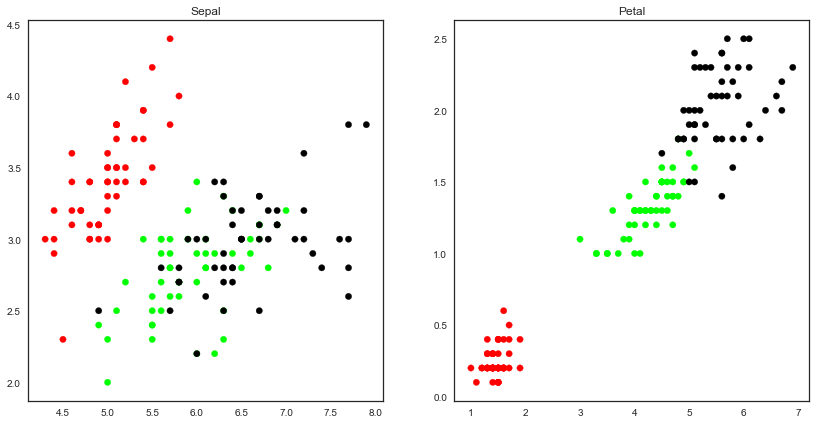

In [116]:
# Set the size of the plot
plt.figure(figsize=(14,7))
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(iris.Sepal_Length, iris.Sepal_Width, c=colormap[target.Targets], s=40)
plt.title('Sepal')
# Plot Petal
plt.subplot(1, 2, 2)
plt.scatter(iris.Petal_Length, iris.Petal_Width, c=colormap[target.Targets], s=40)
plt.title('Petal')

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

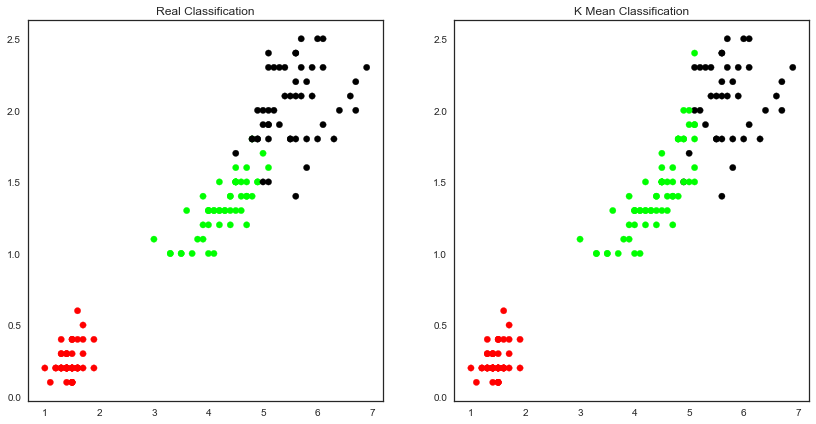

In [148]:
#K-means model & classifier results
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(iris_dat)
# Set the size of the plot
plt.figure(figsize=(14,7))
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(iris.Petal_Length, iris.Petal_Width, c=colormap[target.Targets], s=40)
plt.title('Real Classification')
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(iris.Petal_Length, iris.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
#Performance measures: accuracy & confusion metrix
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
sm.accuracy_score(target, predY)
sm.confusion_matrix(target, predY)

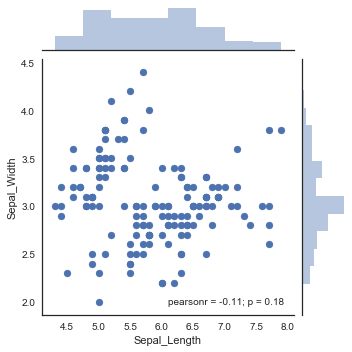

In [149]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='Sepal_Length', y='Sepal_Width', data=iris, size=5)

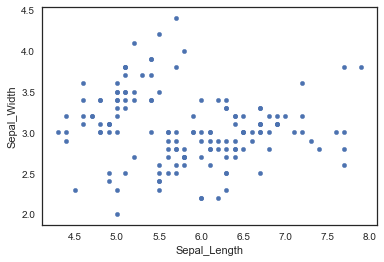

In [150]:
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x='Sepal_Length', y='Sepal_Width')

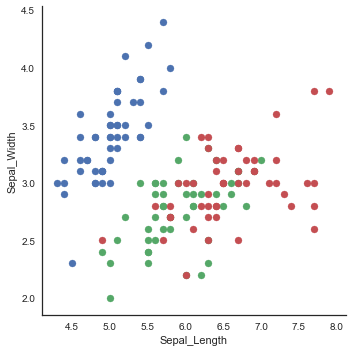

In [168]:
sns.FacetGrid(iris, hue="Targets", size=5) \
   .map(plt.scatter, "Sepal_Length", "Sepal_Width")

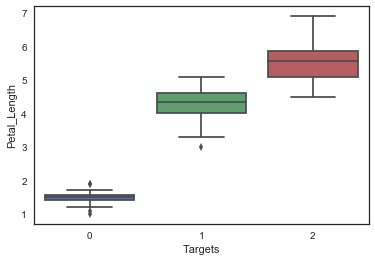

In [167]:
sns.boxplot(x="Targets", y="Petal_Length", data=iris)

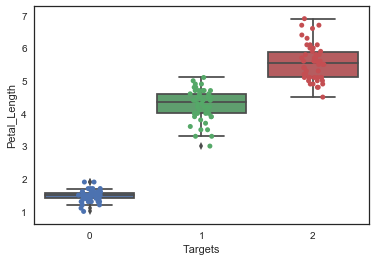

In [169]:
ax = sns.boxplot(x="Targets", y="Petal_Length", data=iris)
ax = sns.stripplot(x="Targets", y="Petal_Length", data=iris, jitter=True, edgecolor="gray")

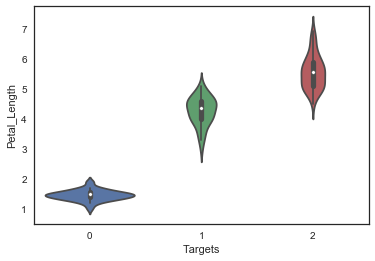

In [170]:
sns.violinplot(x="Targets", y="Petal_Length", data=iris, size=6)

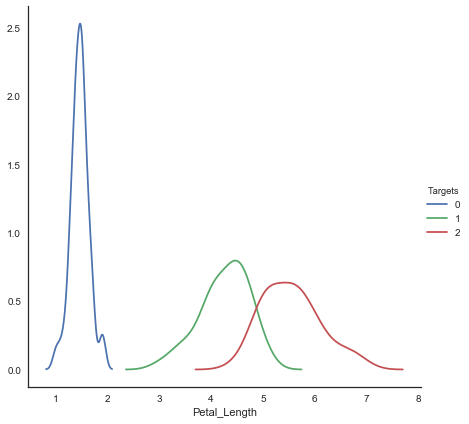

In [171]:
sns.FacetGrid(iris, hue="Targets", size=6) \
   .map(sns.kdeplot, "Petal_Length") \
   .add_legend()

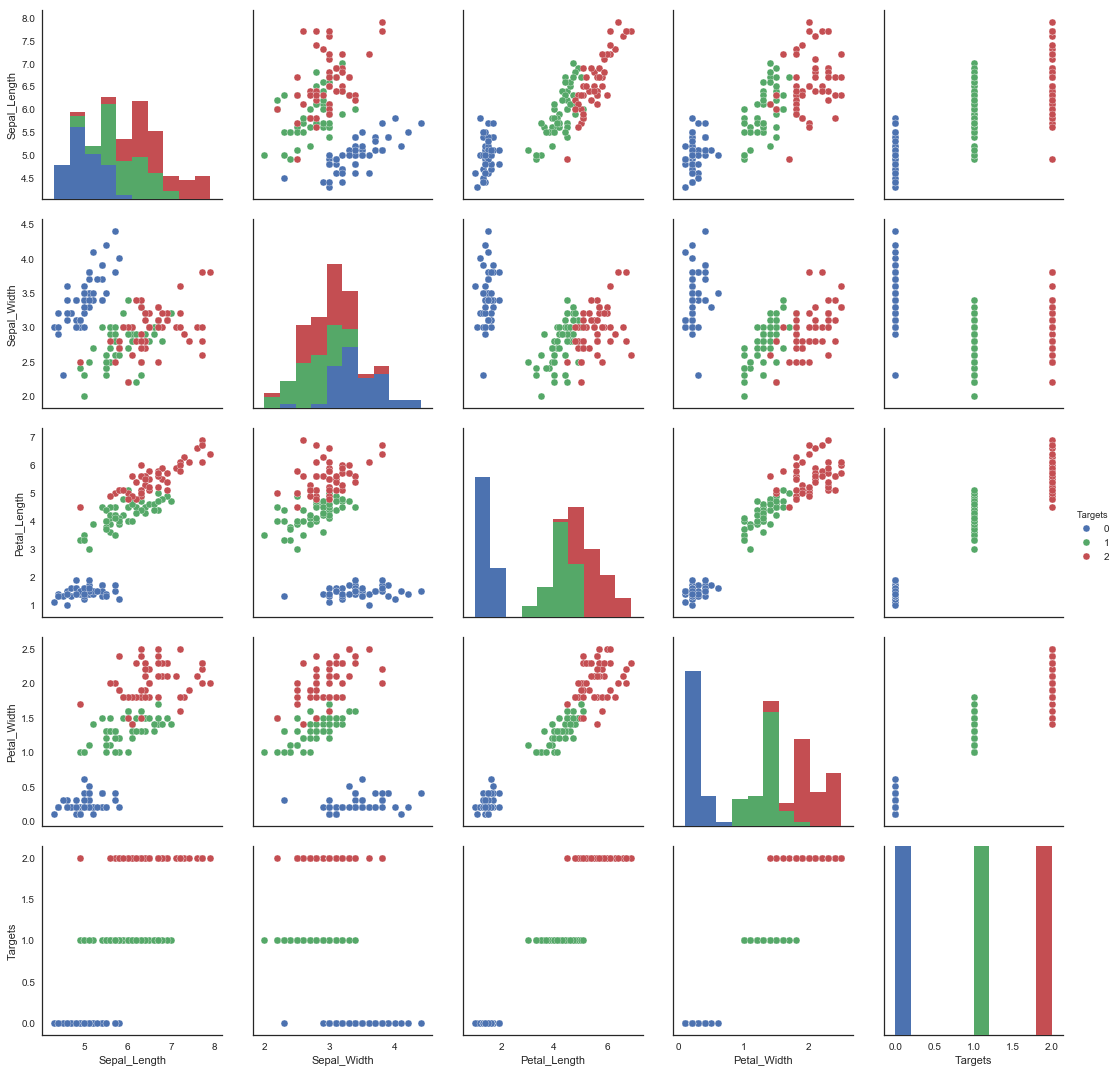

In [175]:
sns.pairplot(iris, hue="Targets", size=3)

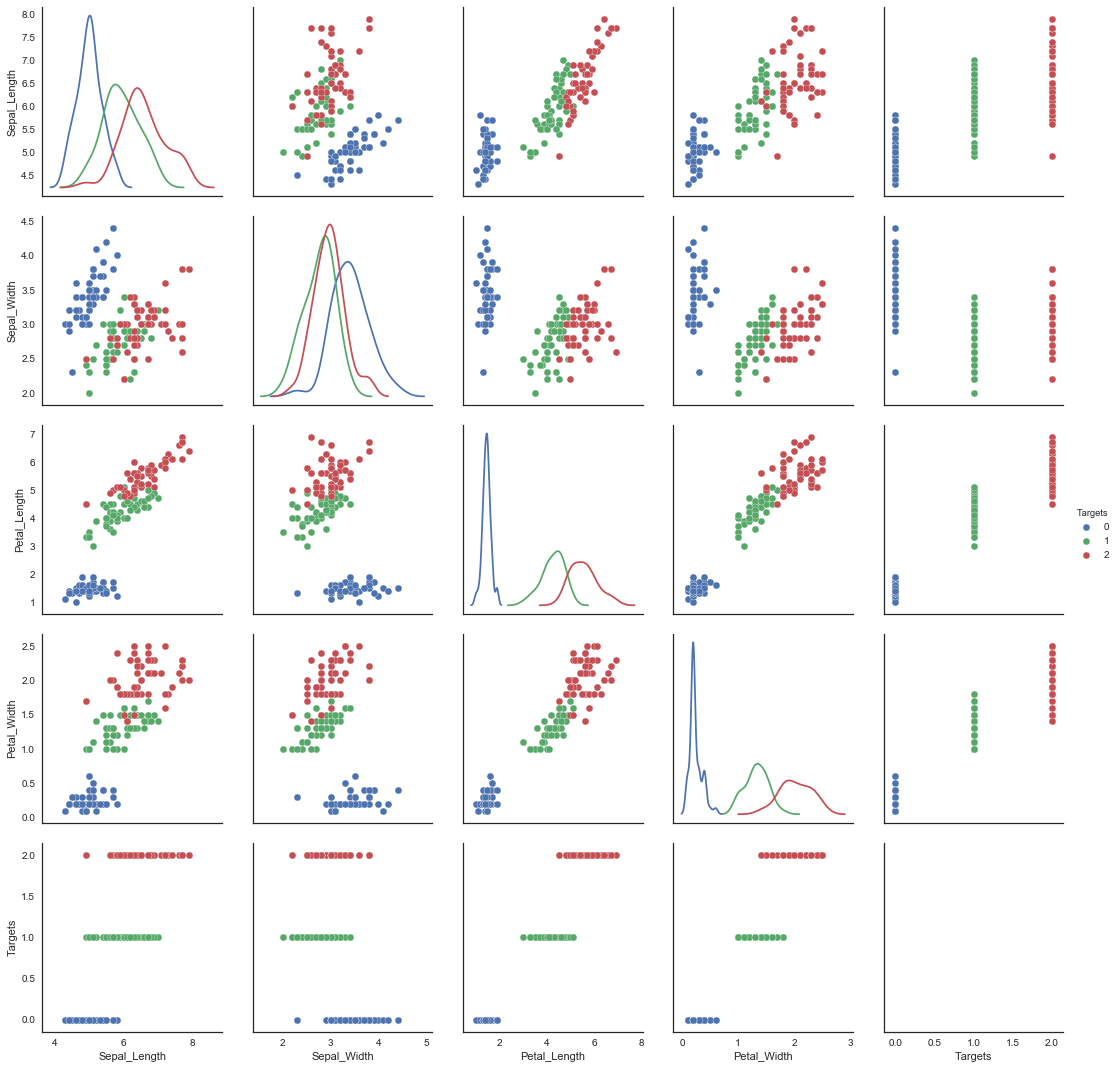

In [178]:
sns.pairplot(iris, hue="Targets", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1229642e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1250ea2b0>]], dtype=object)

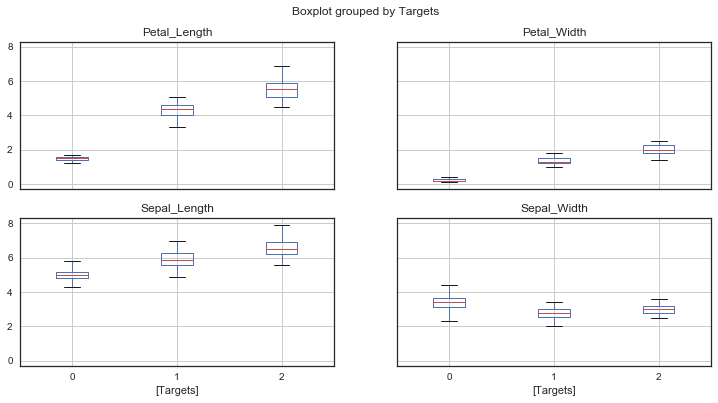

In [180]:
iris.boxplot(by="Targets", figsize=(12, 6))

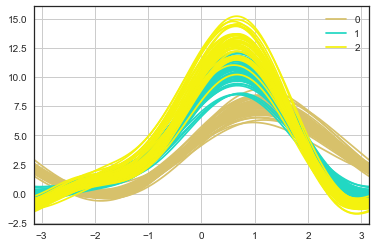

In [181]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, "Targets")

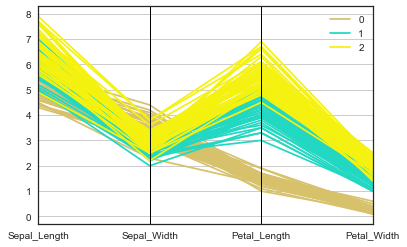

In [182]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, "Targets")

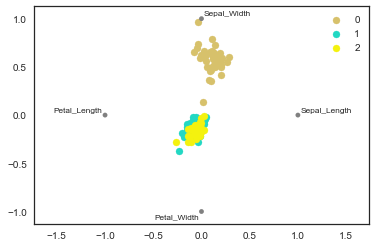

In [183]:
from pandas.tools.plotting import radviz
radviz(iris, "Targets")